In [ ]:
""" 

ELIMINAR

"""

In [25]:
import sys
import json
import numpy as np
import pandas as pd
import time
import cv2

In [ ]:
class ML:
    def __init__(self, json_both, json_onlyleft, json_onlyright, json_radio, json_drinking, json_reachside, json_phonecallright):
        self.both_j = json_both
        self.onlyleft_j = json_onlyleft
        self.onlyright_j = json_onlyright
        self.radio_j = json_radio
        self.drinking_j = json_drinking
        self.reachside_j = json_reachside
        self.phonecallright_j = json_phonecallright

        self.both = []
        self.onlyleft = []
        self.onlyright = []
        self.radio = []
        self.drinking = []
        self.reachside = []
        self.phonecallright = []

        self.rows = []

    def open_jsons(self):

        try:
            with open(self.both_j, 'r', encoding='utf-8-sig') as f:
                self.both = json.load(f)
        except UnicodeDecodeError:
            print(f"Failed to decode JSON file {self.both_j}. Trying alternative encoding...")
            with open(self.both_j, 'r', encoding='latin-1') as f:
                self.both = json.load(f)

        try:
            with open(self.onlyleft_j, 'r', encoding='utf-8-sig') as f:
                self.onlyleft = json.load(f)
        except UnicodeDecodeError:
            print(f"Failed to decode JSON file {self.onlyleft_j}. Trying alternative encoding...")
            with open(self.onlyleft_j, 'r', encoding='latin-1') as f:
                self.onlyleft = json.load(f)

        try:
            with open(self.onlyright_j, 'r', encoding='utf-8-sig') as f:
                self.onlyright = json.load(f)
        except UnicodeDecodeError:
            print(f"Failed to decode JSON file {self.onlyright_j}. Trying alternative encoding...")
            with open(self.onlyright_j, 'r', encoding='latin-1') as f:
                self.onlyright = json.load(f)

        try:
            with open(self.radio_j, 'r', encoding='utf-8-sig') as f:
                self.radio = json.load(f)
        except UnicodeDecodeError:
            print(f"Failed to decode JSON file {self.radio_j}. Trying alternative encoding...")
            with open(self.radio_j, 'r', encoding='latin-1') as f:
                self.radio = json.load(f)

        try:
            with open(self.drinking_j, 'r', encoding='utf-8-sig') as f:
                self.drinking = json.load(f)
        except UnicodeDecodeError:
            print(f"Failed to decode JSON file {self.drinking_j}. Trying alternative encoding...")
            with open(self.drinking_j, 'r', encoding='latin-1') as f:
                self.drinking = json.load(f)

        try:
            with open(self.reachside_j, 'r', encoding='utf-8-sig') as f:
                self.reachside = json.load(f)
        except UnicodeDecodeError:
            print(f"Failed to decode JSON file {self.reachside_j}. Trying alternative encoding...")
            with open(self.reachside_j, 'r', encoding='latin-1') as f:
                self.reachside = json.load(f)

        try:
            with open(self.phonecallright_j, 'r', encoding='utf-8-sig') as f:
                self.phonecallright = json.load(f)
        except UnicodeDecodeError:
            print(f"Failed to decode JSON file {self.phonecallright_j}. Trying alternative encoding...")
            with open(self.phonecallright_j, 'r', encoding='latin-1') as f:
                self.phonecallright = json.load(f)

    def prepare_data(self, data):

        for item in data:

            features = {
                "center_left_x": item['pose']['pose'][50][0],
                "center_left_y": item['pose']['pose'][50][1],
                "center_right_x": item['pose']['pose'][51][0],
                "center_right_y": item['pose']['pose'][51][1],
                "pose_0_x": item['pose']['pose'][0][0],
                "pose_0_y": item['pose']['pose'][0][1],
                "pose_1_x": item['pose']['pose'][1][0],
                "pose_1_y": item['pose']['pose'][1][1],
                "pose_2_x": item['pose']['pose'][2][0],
                "pose_2_y": item['pose']['pose'][2][1],
                "pose_3_x": item['pose']['pose'][3][0],
                "pose_3_y": item['pose']['pose'][3][1],
                "pose_4_x": item['pose']['pose'][4][0],
                "pose_4_y": item['pose']['pose'][4][1],
                "pose_5_x": item['pose']['pose'][5][0],
                "pose_5_y": item['pose']['pose'][5][1],
                "type": item['type'] # cambiar el label
            }
            
            self.rows.append(features)

In [35]:
json_files = [  '/home/arantxa/universidad/TFG/src/balanced_data/hands_using_wheel_both.json', 
                '/home/arantxa/universidad/TFG/src/balanced_data/hands_using_wheel_only_left.json', 
                '/home/arantxa/universidad/TFG/src/balanced_data/hands_using_wheel_only_right.json',
                '/home/arantxa/universidad/TFG/src/balanced_data/driver_actions_radio.json', 
                '/home/arantxa/universidad/TFG/src/balanced_data/driver_actions_drinking.json', 
                '/home/arantxa/universidad/TFG/src/balanced_data/driver_actions_reach_side.json', 
                '/home/arantxa/universidad/TFG/src/balanced_data/driver_actions_phonecall_right.json']

        
ML_performer = ML(*json_files)
ML_performer.open_jsons()
ML_performer.prepare_data(ML_performer.both)
ML_performer.prepare_data(ML_performer.onlyleft)
ML_performer.prepare_data(ML_performer.onlyright)
ML_performer.prepare_data(ML_performer.radio)
ML_performer.prepare_data(ML_performer.drinking)
ML_performer.prepare_data(ML_performer.reachside)
ML_performer.prepare_data(ML_performer.phonecallright)

dataset = pd.DataFrame(ML_performer.rows)
print(dataset)

      center_left_x  center_left_y  center_right_x  center_right_y  pose_0_x  \
0          0.743550       0.619071        0.693113        0.321460  0.373959   
1          0.743340       0.620055        0.692823        0.321257  0.373974   
2          0.742518       0.620522        0.691809        0.320131  0.373852   
3          0.742903       0.621250        0.690796        0.319402  0.373757   
4          0.742530       0.621325        0.690298        0.318795  0.373532   
...             ...            ...             ...             ...       ...   
7345       0.332028       0.210118        0.725491        0.403355  0.345658   
7346       0.332467       0.209694        0.726125        0.398464  0.341597   
7347       0.332491       0.209401        0.726425        0.393098  0.338317   
7348       0.332165       0.209000        0.726959        0.387802  0.334666   
7349       0.331942       0.209576        0.727659        0.382270  0.333337   

      pose_0_y  pose_1_x  pose_1_y  pos

In [36]:
dataset['type'] = dataset['type'].replace("hands_using_wheel/both", 0)
dataset['type'] = dataset['type'].replace("hands_using_wheel/only_left", 1)
dataset['type'] = dataset['type'].replace("hands_using_wheel/only_right", 2)
dataset['type'] = dataset['type'].replace("driver_actions/radio", 3)
dataset['type'] = dataset['type'].replace("driver_actions/drinking", 4)
dataset['type'] = dataset['type'].replace("driver_actions/reach_side", 5)
dataset['type'] = dataset['type'].replace("driver_actions/phonecall_right", 6)

In [37]:
dataset_multilabel = pd.get_dummies(dataset['type'], prefix='class').astype(int)

dataset = pd.concat([dataset, dataset_multilabel], axis=1)
print(dataset)

      center_left_x  center_left_y  center_right_x  center_right_y  pose_0_x  \
0          0.743550       0.619071        0.693113        0.321460  0.373959   
1          0.743340       0.620055        0.692823        0.321257  0.373974   
2          0.742518       0.620522        0.691809        0.320131  0.373852   
3          0.742903       0.621250        0.690796        0.319402  0.373757   
4          0.742530       0.621325        0.690298        0.318795  0.373532   
...             ...            ...             ...             ...       ...   
7345       0.332028       0.210118        0.725491        0.403355  0.345658   
7346       0.332467       0.209694        0.726125        0.398464  0.341597   
7347       0.332491       0.209401        0.726425        0.393098  0.338317   
7348       0.332165       0.209000        0.726959        0.387802  0.334666   
7349       0.331942       0.209576        0.727659        0.382270  0.333337   

      pose_0_y  pose_1_x  pose_1_y  pos

In [38]:
num_classes = dataset['type'].max() + 1

dataset['multilabel'] = dataset['type'].apply(lambda x: [1 if i == x else 0 for i in range(num_classes)])

dataset = dataset.drop(columns=['type'])

print(dataset)

      center_left_x  center_left_y  center_right_x  center_right_y  pose_0_x  \
0          0.743550       0.619071        0.693113        0.321460  0.373959   
1          0.743340       0.620055        0.692823        0.321257  0.373974   
2          0.742518       0.620522        0.691809        0.320131  0.373852   
3          0.742903       0.621250        0.690796        0.319402  0.373757   
4          0.742530       0.621325        0.690298        0.318795  0.373532   
...             ...            ...             ...             ...       ...   
7345       0.332028       0.210118        0.725491        0.403355  0.345658   
7346       0.332467       0.209694        0.726125        0.398464  0.341597   
7347       0.332491       0.209401        0.726425        0.393098  0.338317   
7348       0.332165       0.209000        0.726959        0.387802  0.334666   
7349       0.331942       0.209576        0.727659        0.382270  0.333337   

      pose_0_y  pose_1_x  pose_1_y  pos

In [21]:
print(dataset_multilabel)

      class_0  class_1  class_2  class_3  class_4  class_5  class_6
0           1        0        0        0        0        0        0
1           1        0        0        0        0        0        0
2           1        0        0        0        0        0        0
3           1        0        0        0        0        0        0
4           1        0        0        0        0        0        0
...       ...      ...      ...      ...      ...      ...      ...
7345        0        0        0        0        0        0        1
7346        0        0        0        0        0        0        1
7347        0        0        0        0        0        0        1
7348        0        0        0        0        0        0        1
7349        0        0        0        0        0        0        1

[7350 rows x 7 columns]


In [59]:
df_grouped = (
    dataset.groupby(list(dataset.columns[:-1]), as_index=False)
    .agg({"type": lambda x: ','.join(map(str, sorted(x.unique())))})
)

dataset = df_grouped

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, :-1] # todo menos etiquetas
Y = dataset.iloc[:, -1] # etiquetas

X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y, test_size=0.25, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler # revisar si hace falta (no)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm_classifier = SVC(kernel='rbf', probability=True, random_state=42)
svm_classifier.fit(X_train, Y_train)

probabilities = svm_classifier.predict_proba(X_test)

for i, probs in enumerate(probabilities[:100]):
    print(f"Instancia {i+1}:")
    for cls, prob in enumerate(probs):
        print(f"  Clase {cls}: {prob:.2f}")

Y_pred = svm_classifier.predict(X_test)

print("\nReporte de clasificación:")
print(classification_report(Y_test, Y_pred))


Instancia 1:
  Clase 0: 0.00
  Clase 1: 0.01
  Clase 2: 0.00
  Clase 3: 0.00
  Clase 4: 0.99
  Clase 5: 0.00
  Clase 6: 0.00
Instancia 2:
  Clase 0: 0.00
  Clase 1: 1.00
  Clase 2: 0.00
  Clase 3: 0.00
  Clase 4: 0.00
  Clase 5: 0.00
  Clase 6: 0.00
Instancia 3:
  Clase 0: 0.00
  Clase 1: 0.01
  Clase 2: 0.00
  Clase 3: 0.00
  Clase 4: 0.98
  Clase 5: 0.00
  Clase 6: 0.00
Instancia 4:
  Clase 0: 0.00
  Clase 1: 0.00
  Clase 2: 1.00
  Clase 3: 0.00
  Clase 4: 0.00
  Clase 5: 0.00
  Clase 6: 0.00
Instancia 5:
  Clase 0: 0.00
  Clase 1: 0.01
  Clase 2: 0.00
  Clase 3: 0.00
  Clase 4: 0.00
  Clase 5: 0.01
  Clase 6: 0.98
Instancia 6:
  Clase 0: 0.00
  Clase 1: 1.00
  Clase 2: 0.00
  Clase 3: 0.00
  Clase 4: 0.00
  Clase 5: 0.00
  Clase 6: 0.00
Instancia 7:
  Clase 0: 0.00
  Clase 1: 0.00
  Clase 2: 0.97
  Clase 3: 0.00
  Clase 4: 0.00
  Clase 5: 0.02
  Clase 6: 0.00
Instancia 8:
  Clase 0: 0.00
  Clase 1: 0.02
  Clase 2: 0.00
  Clase 3: 0.00
  Clase 4: 0.00
  Clase 5: 0.96
  Clase 6: 0.01


In [41]:
print(Y_train)

3305    [0, 0, 0, 1, 0, 0, 0]
7024    [0, 0, 0, 0, 0, 0, 1]
5869    [0, 0, 0, 0, 0, 1, 0]
6401    [0, 0, 0, 0, 0, 0, 1]
501     [1, 0, 0, 0, 0, 0, 0]
                ...          
905     [1, 0, 0, 0, 0, 0, 0]
5192    [0, 0, 0, 0, 1, 0, 0]
3980    [0, 0, 0, 1, 0, 0, 0]
235     [1, 0, 0, 0, 0, 0, 0]
5157    [0, 0, 0, 0, 1, 0, 0]
Name: multilabel, Length: 5512, dtype: object


In [47]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo para clasificación multilabel
model = OneVsRestClassifier(RandomForestClassifier(random_state=1))

# Entrenar el modelo
model.fit(X_train, list(Y_train)) 

Y_pred = model.predict(X_test)

# Verificar las predicciones
print(Y_pred[:5])  # Muestra las primeras filas predichas

import numpy as np

# Convertir a arrays binarios
Y_test = np.array(list(Y_test))  # Asegúrate de convertir las listas en un array
Y_pred = np.array(Y_pred)        # Si Y_pred sigue siendo una lista, haz lo mismo


from sklearn.metrics import classification_report, hamming_loss

# Hamming Loss
print("Hamming Loss:", hamming_loss(Y_test, Y_pred))

# Clasificación por cada etiqueta
print(classification_report(Y_test, Y_pred))

[[0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1]]
Hamming Loss: 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       239
           1       1.00      1.00      1.00       260
           2       1.00      1.00      1.00       260
           3       1.00      1.00      1.00       270
           4       1.00      1.00      1.00       287
           5       1.00      1.00      1.00       265
           6       1.00      1.00      1.00       257

   micro avg       1.00      1.00      1.00      1838
   macro avg       1.00      1.00      1.00      1838
weighted avg       1.00      1.00      1.00      1838
 samples avg       1.00      1.00      1.00      1838



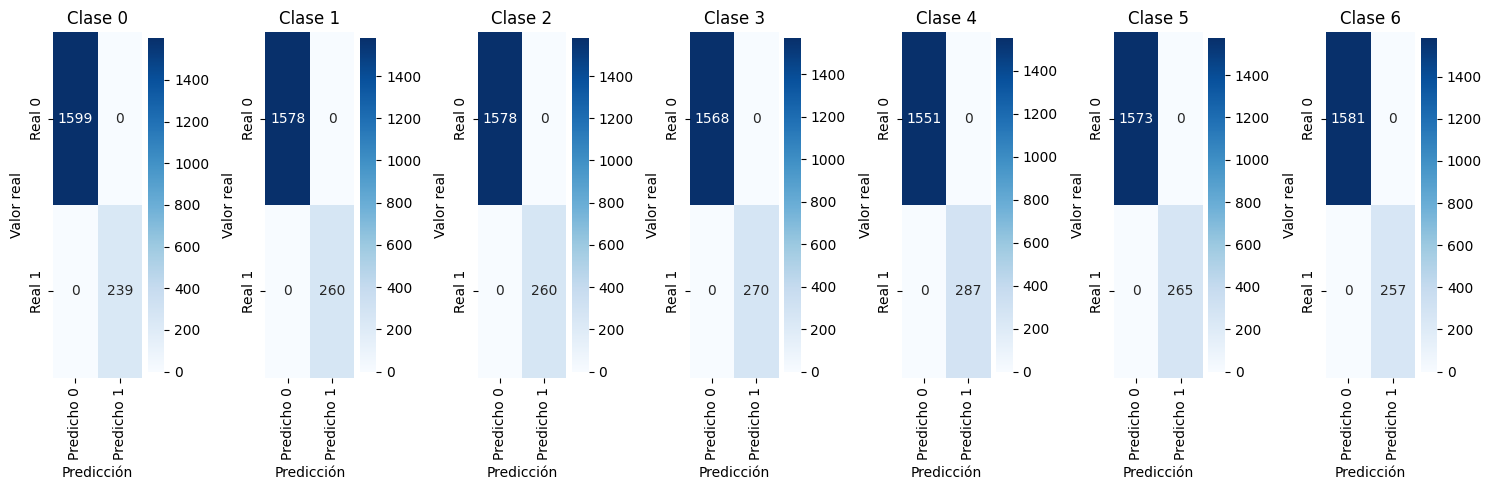

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np

# Asegúrate de que Y_test y Y_pred están como arrays de numpy
Y_test = np.array(list(Y_test))
Y_pred = np.array(Y_pred)

# Obtener la matriz de confusión
mcm = multilabel_confusion_matrix(Y_test, Y_pred)

# Establecer el tamaño del gráfico
fig, axes = plt.subplots(1, len(mcm), figsize=(15, 5))

# Recorrer cada matriz de confusión y graficarla
for i in range(len(mcm)):
    ax = axes[i]
    sns.heatmap(mcm[i], annot=True, fmt='d', cmap='Blues', xticklabels=['Predicho 0', 'Predicho 1'], yticklabels=['Real 0', 'Real 1'], ax=ax)
    ax.set_title(f'Clase {i}')
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Valor real')

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()
plt.show()


In [50]:
import numpy as np

# Verificar si alguna predicción tiene más de una clase activada
for i, prediction in enumerate(Y_pred):
    if np.sum(prediction) > 1:  # Si la suma de la predicción es mayor que 1, significa que hay más de una clase activa
        print(f"Ejemplo {i} tiene más de una clase activada: {prediction}")


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# Usando MultiOutputClassifier para un clasificador multi-etiqueta
model = MultiOutputClassifier(RandomForestClassifier(), n_jobs=-1)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)


ValueError: You appear to be using a legacy multi-label data representation. Sequence of sequences are no longer supported; use a binary array or sparse matrix instead - the MultiLabelBinarizer transformer can convert to this format.

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenar el modelo Random Forest
model = RandomForestClassifier(random_state=1)
model.fit(X_train, Y_train)

# Hacer predicciones
Y_pred = model.predict(X_test)

# Evaluación
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

ValueError: Unknown label type: unknown. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

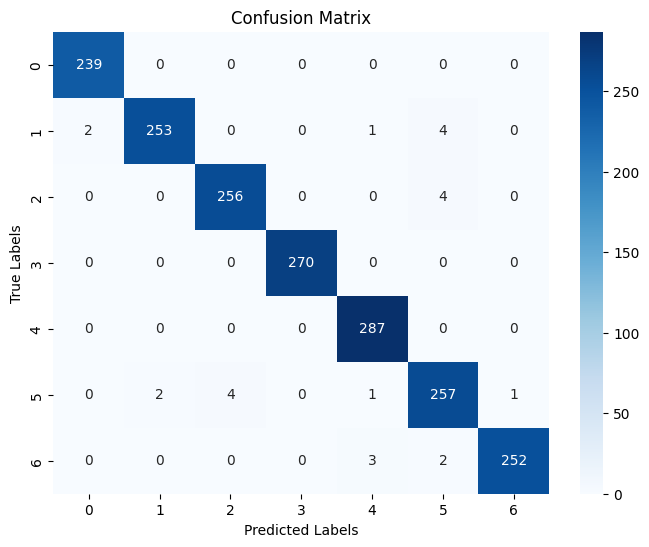

In [10]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Mostrar la matriz de confusión con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_model = DecisionTreeClassifier(criterion='gini',
                                    max_depth=13,
                                    random_state=1,
                                    probability=True)
tree_model.fit(X_train, Y_train)

y_pred=tree_model.predict(X_test)
print('Acc: %.3f' % accuracy_score(Y_test, y_pred))

TypeError: DecisionTreeClassifier.__init__() got an unexpected keyword argument 'probability'